# Linear Regression

In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# this allows plots to appear directly in the notebook %matplotlib inline
from sklearn.model_selection import KFold
# libraries for regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns

sns.set()

import os, sys
import random
import sklearn

#from sklearn import cross_validation

In [3]:
# reading CSV file
data = pd.read_csv("C:\\Users\\Krina Thakkar\\featureEng.csv")

In [4]:
# split data into training and validation
train, test = train_test_split(data, train_size = 0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
# initializing features and target values for training and testing
X_train = train[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
y_train = train['int_rate']
X_test = test[['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months']]
y_test = test['int_rate']

# Defining function to calculate accuracy score, MAE, RMS and MAPE

In [17]:
def calc_error(modelname, model, X_train, y_train, X_test, y_test):
        global error_metric
        y_train_predicted = model.predict(X_train)
        y_test_predicted = model.predict(X_test)
        
        #score
        print('Training score: {}'.format(model.score(X_train, y_train)))
        print('Test score: {}'.format(model.score(X_test, y_test)))
        print('\n')
        
        #MAE
        print(modelname,"mean_squared_error train : ",mean_squared_error(y_train, y_train_predicted))
        print(modelname,'mean_squared_error test : ',mean_squared_error(y_test, y_test_predicted))
        print('\n')
        
        #RMS
        print(modelname,'mean_absolute_error train : ',mean_absolute_error(y_train, y_train_predicted))
        print(modelname,'mean_absolute_error test: ',mean_absolute_error(y_test, y_test_predicted))
        print('\n')
        
        #MAPE
        print(modelname,'mean_absolute_percent_error (MAPE) train : ',np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100)
        print(modelname,'mean_absolute_percent_error (MAPE) test :',np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100)
        print('\n')
        
        plt.scatter(y_test,y_test_predicted)

# Linear Regression

Training score: 0.9473809390687132
Test score: 0.9218270363052548


Linear Regression mean_squared_error train :  0.9872414394008234
Linear Regression mean_squared_error test :  1.521234616224631


Linear Regression mean_absolute_error train :  0.8290133009800985
Linear Regression mean_absolute_error test:  0.9808909984084969


Linear Regression mean_absolute_percent_error (MAPE) train :  int_rate    7.334076
dtype: float64
Linear Regression mean_absolute_percent_error (MAPE) test : int_rate    7.496994
dtype: float64


Linear Regression completed


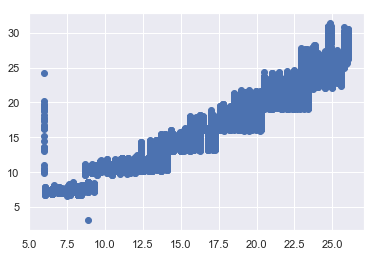

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
calc_error('Linear Regression', lr, X_train, y_train, X_test, y_test)
print('Linear Regression completed')

# Linear Regression with 5-fold cross validation

In [7]:
def calculateScore(X_train,y_train,X_test,y_test):
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)
    print("MAPE for train set:",np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100)
    print("MAPE for test set:",np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100)

In [8]:
kf = KFold(n_splits=5)
dataset = data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months','int_rate']]
#Seperating dependent and independent variables
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(calculateScore(X_train,y_train,X_test,y_test))

MAPE: int_rate    7.496994
dtype: float64
None
MAPE: int_rate    6.89552
dtype: float64
None
MAPE: int_rate    8.239484
dtype: float64
None
MAPE: int_rate    7.878699
dtype: float64
None
MAPE: int_rate    7.25185
dtype: float64
None


In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
dataset = data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv','installment','grade','dti','inq_last_6mths','revol_util','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','purpose_debt_consolidation','verification_status_Verified','term_ 60 months','int_rate']]
#Seperating dependent and independent variables
X_dash = dataset.iloc[:,:-1]
y1 = dataset.iloc[:,-1:]
accuracy = []
KFold(n_splits=5,shuffle=False)
for train_index, test_index in kf.split(X_dash):
    regressor = LinearRegression()
    regressor.fit(X_dash.iloc[train_index],y1.iloc[train_index])
    acc = regressor.score(X_dash.iloc[test_index],y1.iloc[test_index])
    accuracy.append(acc)

In [13]:
print(accuracy)

[0.9218270363052548, 0.9405731832976354, 0.9359205090850615, 0.9466601212501488, 0.9496883143177385]


# Hyperparameter tuning - L1 (Lasso Regressor) using GridSearchCV

In [13]:
# Hyperparameter tuning - Lasso Regressor using GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

{'alpha': 1e-15}
-1.032399939919746


# Hyperparameter tuning - L2 (Ridge Regressor) using GridSearchCV

In [15]:
# Hyperparameter tuning - Ridge Regressor using GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, y_train)
# Hyperparameter tuning - Ridge Regressor using GridSearchCV

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.785959e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.785959e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.785959e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.785959e-17
  overwrite_a=True).T
C:\Progr

{'alpha': 1e-15}
-1.036459365701526


# Hyperparameter tuning - Elastic Net using GridSearchCV

In [16]:
# Hyperparameter tuning - Elastic Net using GridSearchCV
elasticnet = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
elasticnet_regressor = GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(X_train, y_train)
# Hyperparameter tuning - Ridge Regressor using GridSearchCV

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

{'alpha': 1e-15}
-1.036459365701526


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
